## Reto 2: Error estándar e intervalos de confianza

### 1. Objetivos:
    - Aprender a calcular e interpretar errores estándar e intervalos de confianza
 
---
    
### 2. Desarrollo:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HesusG/da-python-procesamiento-datos/blob/master/sesion_4/reto4.ipynb)

Para este Reto de nuevo podrás elegir el dataset de tu agrado. Elige un dataset o una variable distinta que la del Reto anterior. Recuerda ordenar y explicar bien tu análisis para que sea comprensible para los demás. Una vez que hayas elegido un dataset y una variable que te parezcan interesantes, realiza los siguientes pasos:

1. Primero explora tu variable con los métodos tradicionales: estimados de locación y dispersión, histograma, etc.
2. Ahora usa la técnica de bootstrap para obtener la distribución muestral de la media y de la mediana de tu variable. Elige los parámetros más adecuados para el bootstrap basándote en los resultados obtenidos en el Reto anterior.
3. Grafica la distribución muestral de la media y la mediana.
4. Ahora, obtén el error estándar de ambas medidas estadísticas. Utiliza el mínimo, el máximo y el rango para contextualizar tu error estándar y saber qué tan grande o pequeño es.
5. Ahora, para cada medida estadística obtén los intervalos de confianza de 90%, 95% y 99%. Compara los resultados.
6. Comparte tus hallazgos con tus compañeros.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(style="whitegrid")  
sns.set_palette("pastel")  

pd.set_option('display.max_columns', None)  
pd.set_option('display.float_format', '{:.2f}'.format) 
pd.set_option('display.width', 1000)  

In [3]:
error_std_media = None
error_std_mediana = None

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/f3eb6f4e0b70ac877359e0519a12d99c969e3773/Datasets/videogame_sales-raw.csv")

In [5]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


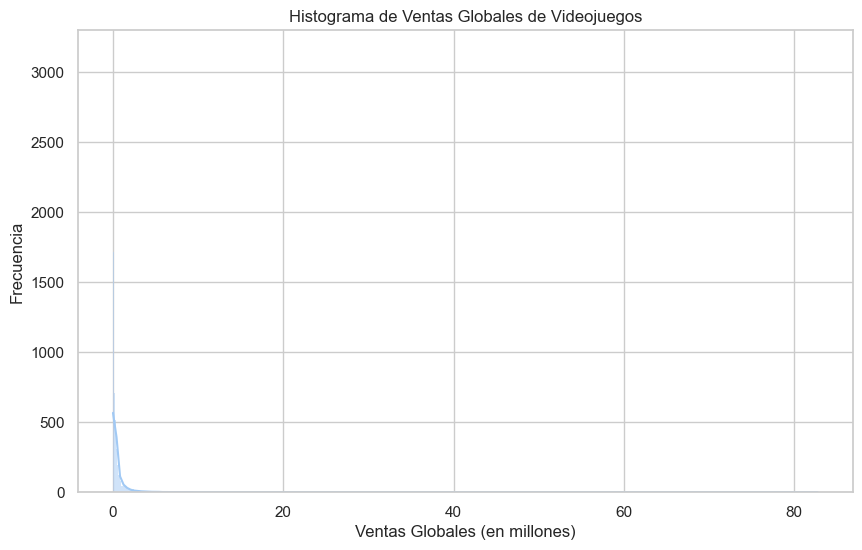

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Global_Sales'], kde=True)
plt.title('Histograma de Ventas Globales de Videojuegos')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Frecuencia')
plt.show()

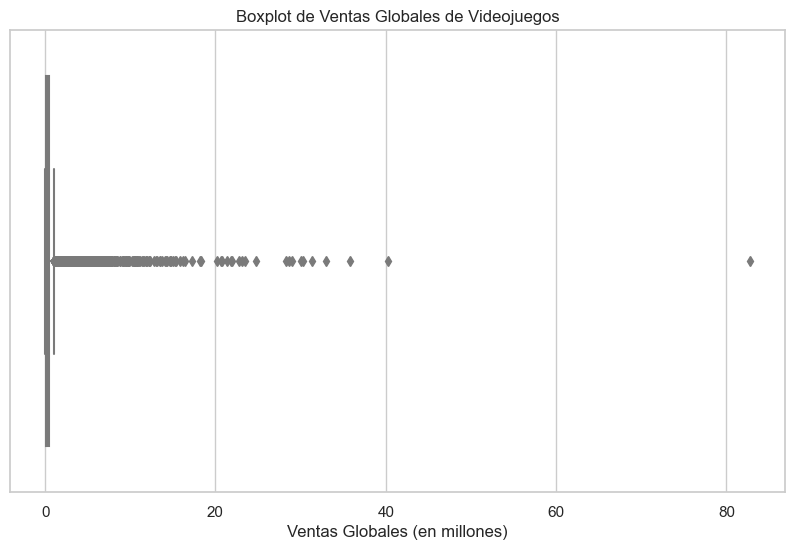

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Global_Sales'])
plt.title('Boxplot de Ventas Globales de Videojuegos')
plt.xlabel('Ventas Globales (en millones)')
plt.show()

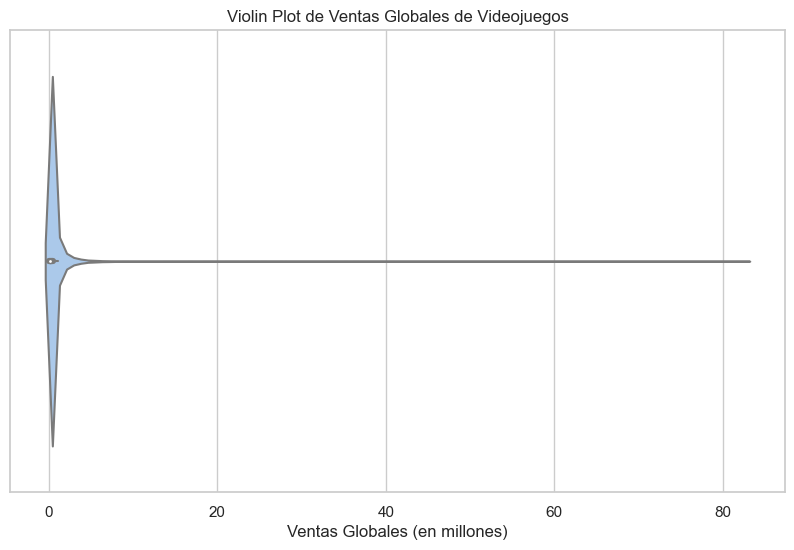

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=data['Global_Sales'])
plt.title('Violin Plot de Ventas Globales de Videojuegos')
plt.xlabel('Ventas Globales (en millones)')
plt.show()

El gráfico tiene una forma similar a un violín o una media luna, de ahí su nombre. La parte ancha del violín representa las regiones de mayor densidad de datos, mientras que las partes estrechas indican regiones de menor densidad.

Box Plot en el Interior: En el centro del violín, generalmente encontrarás un box plot vertical. Este box plot muestra la mediana (línea en el medio), los cuartiles (cajas superior e inferior) y los posibles valores atípicos (puntos fuera de las "bigotes").

En una distribución asimétrica, la media (promedio) puede no ser una medida representativa de la tendencia central de los datos. En cambio, la mediana (el valor que divide la mitad superior de los datos de la mitad inferior) puede ser una medida más adecuada para describir la ubicación central de los datos, ya que es menos sensible a los valores atípicos y refleja mejor la posición del pico de la distribución.

In [11]:
data[data['Global_Sales'] < 1]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2081,2083,Dead Space 3,X360,2013.00,Action,Electronic Arts,0.64,0.28,0.00,0.08,0.99
2082,2084,Phoenix Wright: Ace Attorney,DS,2005.00,Adventure,Capcom,0.49,0.07,0.39,0.05,0.99
2083,2085,NFL Fever 2002,XB,2000.00,Sports,Microsoft Game Studios,0.74,0.21,0.00,0.04,0.99
2084,2086,The Simpsons: Hit & Run,GC,2003.00,Racing,Vivendi Games,0.77,0.20,0.00,0.03,0.99
2085,2087,Littlest Pet Shop: Winter,DS,2008.00,Simulation,Electronic Arts,0.59,0.31,0.00,0.10,0.99
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.00,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.00,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.00,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.00,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
len(data[data['Global_Sales'] < 1]) / len(data)

0.874623448608266

In [13]:
def bootstraping_sample_statistic(data, columna, muestras=1000, n_muestra=400):

    n_size = n_muestra
    sample_statistic = []

    np.random.seed(12345)  # Para reproducibilidad
    for i in range(muestras):
        sample = np.random.choice(data[columna], size=n_size, replace=True) # importante el replace
        sample_statistic.append(np.mean(sample))

    bootstrap_medias = np.array(sample_statistic)


    plt.figure(figsize=(10, 6))
    sns.histplot(bootstrap_medias, kde=True)
    plt.title('Distribución Muestral de la Media')
    plt.xlabel('Media de Ventas Globales (en millones)')
    plt.ylabel('Frecuencia')
    plt.show()

    return bootstrap_medias

**Bootstrapping:** 
El bootstrapping es una técnica de re-muestreo que implica tomar repetidamente muestras de un conjunto de datos con reemplazo y calcular una estadística (como la media o la mediana) para cada muestra. Estas estadísticas de las muestras se utilizan para estimar propiedades como la media y la mediana de la población, el error estándar de estas estimaciones y los intervalos de confianza. El bootstrapping es particularmente útil cuando no se conoce la distribución subyacente de los datos o cuando el conjunto de datos es pequeño.


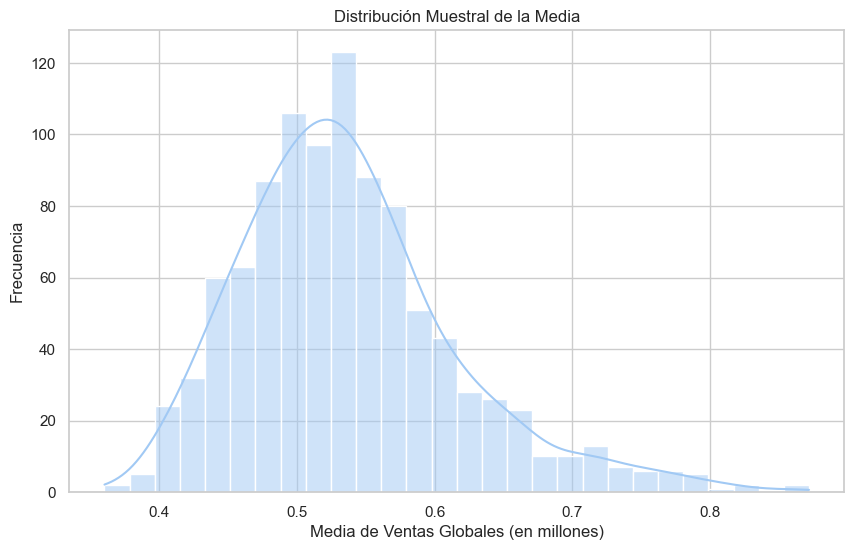

In [14]:
medias = bootstraping_sample_statistic(data,'Global_Sales', 1000)

Observas que el histograma se extiende desde 0 hasta 0.8 en el eje x. Esto indica que las medias de tus muestras bootstrap se encuentran en ese rango.<br>

La forma de campana del histograma, a pesar del sesgo leve hacia la izquierda, sugiere que las medias se distribuyen de manera más o menos simétrica alrededor de un valor central. Esta es una característica deseable, ya que significa que las medias bootstrap tienden a estar centradas en un valor que podría ser una buena estimación de la media poblacional.<br>

<b>Para qué lo usamos</b>
Estimación de la Media Poblacional: El histograma de medias te permite estimar la media poblacional o un valor típico de 'Global_Sales' junto con su variabilidad. No te proporciona probabilidades de eventos específicos, sino una distribución de probabilidad de la media muestral.

Intervalos de Confianza: Puedes utilizar la distribución de medias muestrales para construir intervalos de confianza alrededor de la estimación de la media poblacional. Estos intervalos te dan una idea de la probabilidad de que la verdadera media poblacional se encuentre dentro de cierto rango.

Inferencia Estadística: Si deseas realizar inferencias sobre 'Global_Sales', como probar hipótesis o realizar predicciones, puedes utilizar la información del histograma y técnicas estadísticas para calcular probabilidades relacionadas con esas inferencias.

# 3. Error Estándar y Intervalos de Confianza

In [15]:
def calcular_error_estandar(distribucion):
    distribucion_pd = pd.Series(distribucion)
    desviacion_estandar = distribucion_pd.std()
    n = len(distribucion_pd)
    error_estandar = desviacion_estandar / (n ** 0.5)
    return error_estandar

def calcular_intervalo_confianza_95(distribucion):
    distribucion_pd = pd.Series(distribucion)
    lower_quantile = round(distribucion_pd.quantile(0.025), 2)
    upper_quantile = round(distribucion_pd.quantile(0.975), 2)
    
    confidence_interval = [lower_quantile, upper_quantile]
    return confidence_interval

In [16]:
calcular_error_estandar(medias)

0.002503404818534117

**Error Estándar:** 
El error estándar de una estadística (como la media) es una medida de la variabilidad o dispersión de sus valores cuando se toman múltiples muestras de una población. Esencialmente, indica cuánto se espera que varíe la estadística de una muestra a otra. Un error estándar pequeño sugiere que la estadística es relativamente precisa (es decir, no varía mucho entre las muestras), mientras que un error estándar grande indica una mayor variabilidad y, por lo tanto, menor precisión.

In [17]:
calcular_intervalo_confianza_95(medias)

[0.41, 0.74]

**Intervalo de Confianza:** 
    Un intervalo de confianza proporciona un rango estimado de valores que es probable que incluya un parámetro de población desconocido. Por ejemplo, un intervalo de confianza del 95% para la media sugiere que si tomáramos muchas muestras y calculáramos este intervalo para cada una, esperaríamos que aproximadamente el 95% de estos intervalos contengan la verdadera media de la población. Los intervalos de confianza son una forma de cuantificar la incertidumbre asociada con una estimación.